In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error, auc, roc_curve, classification_report, accuracy_score,recall_score, roc_auc_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df = df.drop(columns = "id")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [4]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
df.bmi.replace(to_replace=np.nan, value=df.bmi.mean(),inplace=True)

In [5]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [5]:
df = df[df.gender != 'Other']

In [7]:
df.describe() 

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.894508,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.698235,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Female    2994
Male      2115
Name: gender, dtype: int64


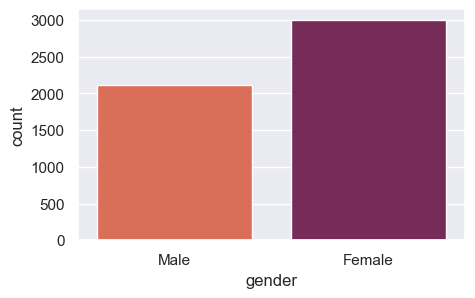

In [8]:
print(df.gender.value_counts())
plt.figure(figsize=(5,3))
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df, x='gender', palette='rocket_r')

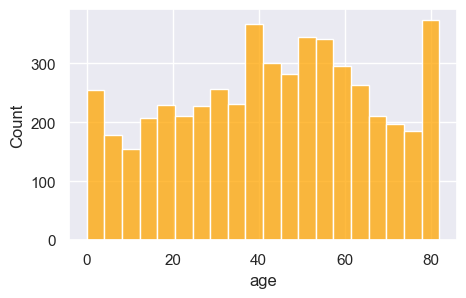

In [9]:
plt.figure(figsize=(5,3));
sns.set_theme(style='darkgrid');
ax = sns.histplot(data=df, x='age', color='orange', fill=True);

0    4611
1     498
Name: hypertension, dtype: int64


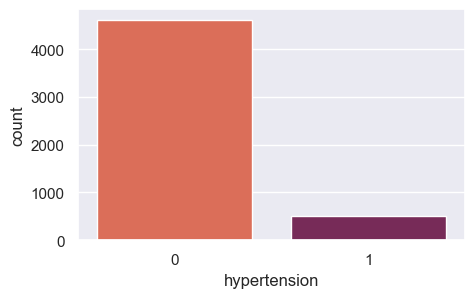

In [10]:
print(df.hypertension.value_counts())
plt.figure(figsize=(5,3))
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df, x='hypertension', palette='rocket_r')

0    4833
1     276
Name: heart_disease, dtype: int64


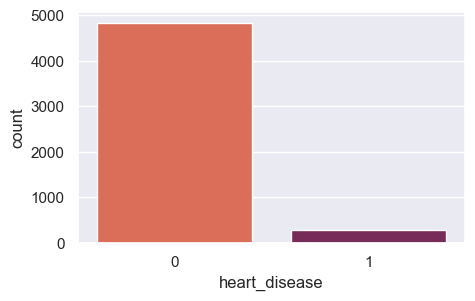

In [11]:
print(df.heart_disease.value_counts())
plt.figure(figsize=(5,3))
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df, x='heart_disease', palette='rocket_r')

Yes    3353
No     1756
Name: ever_married, dtype: int64


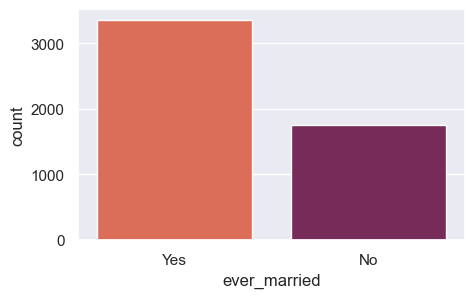

In [12]:
print(df.ever_married.value_counts())
plt.figure(figsize=(5,3))
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df, x='ever_married', palette='rocket_r')

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


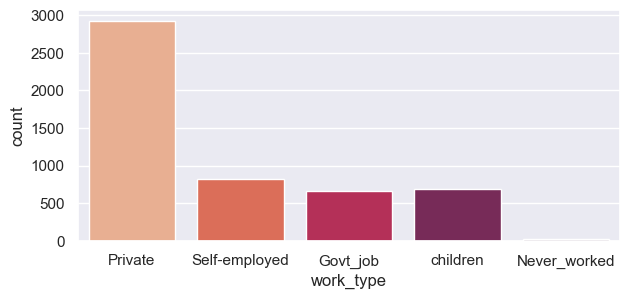

In [13]:
print(df.work_type.value_counts())
plt.figure(figsize=(7,3))
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df, x='work_type', palette='rocket_r')

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64


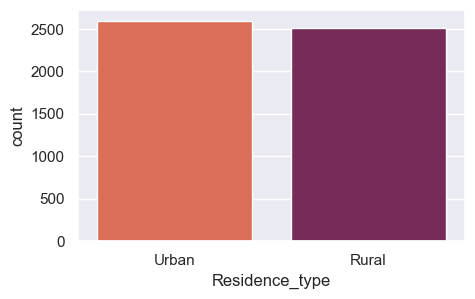

In [14]:
print(df.Residence_type.value_counts())
plt.figure(figsize=(5,3))
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df, x='Residence_type', palette='rocket_r')

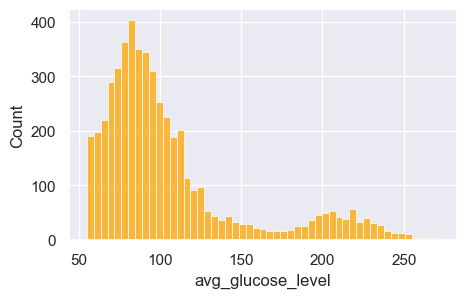

In [15]:
plt.figure(figsize=(5,3));
sns.set_theme(style='darkgrid');
ax = sns.histplot(data=df, x='avg_glucose_level', color='orange', fill=True);

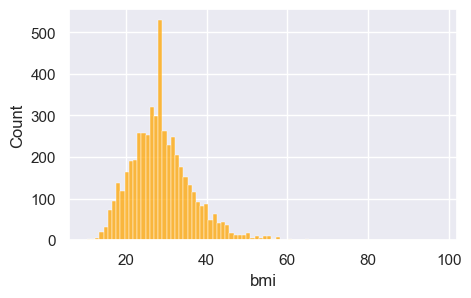

In [16]:
plt.figure(figsize=(5,3));
sns.set_theme(style='darkgrid');
ax = sns.histplot(data=df, x='bmi', color='orange', fill=True);

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64


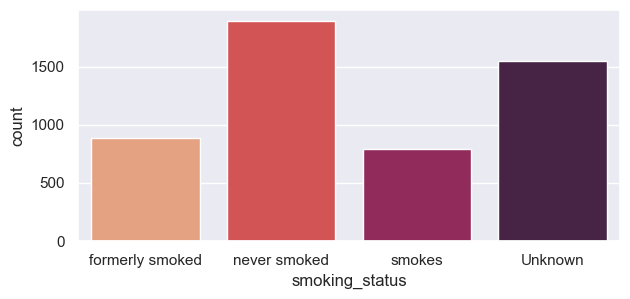

In [17]:
print(df.smoking_status.value_counts())
plt.figure(figsize=(7,3))
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df, x='smoking_status', palette='rocket_r')

0    4860
1     249
Name: stroke, dtype: int64


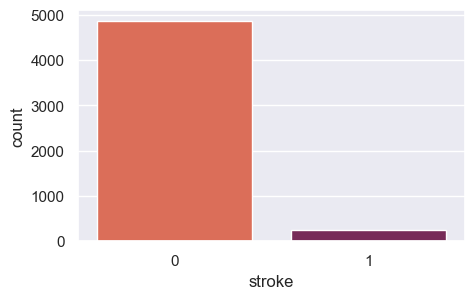

In [18]:
print(df.stroke.value_counts())
plt.figure(figsize=(5,3))
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df, x='stroke', palette='rocket_r')

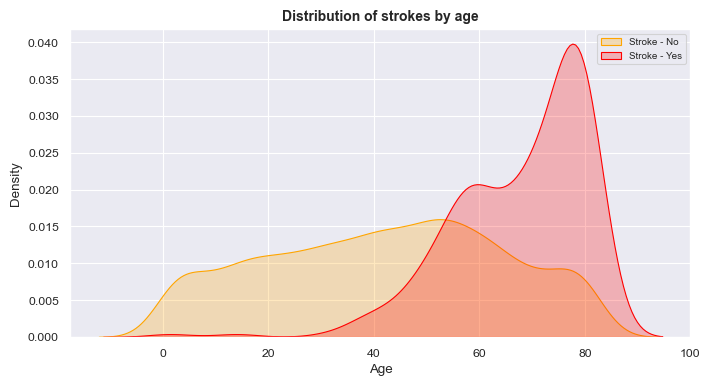

In [19]:
sns.set_context("paper",font_scale=1)
_, ax = plt.subplots(figsize=(8,4))
ax = sns.kdeplot(df.age[(df["stroke"] == 0) ], color='orange', fill=True);
ax = sns.kdeplot(df.age[(df["stroke"] == 1) ], color='red', fill=True);
ax.legend(["Stroke - No","Stroke - Yes"],loc='upper right',fontsize=7);
ax.set_ylabel('Density');
ax.set_xlabel('Age');
ax.set_title('Distribution of strokes by age',fontdict={'fontsize':10,'fontweight':'bold'});

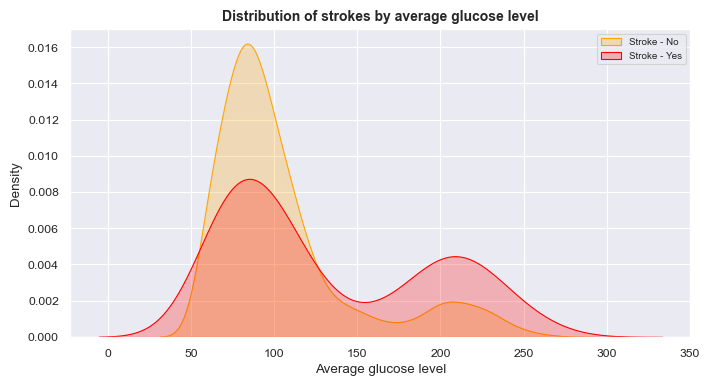

In [20]:
sns.set_context("paper",font_scale=1)
_, ax = plt.subplots(figsize=(8,4))
ax = sns.kdeplot(df.avg_glucose_level[(df["stroke"] == 0) ], color='orange', fill=True);
ax = sns.kdeplot(df.avg_glucose_level[(df["stroke"] == 1) ], color='red', fill=True);
ax.legend(["Stroke - No","Stroke - Yes"],loc='upper right',fontsize=7);
ax.set_ylabel('Density');
ax.set_xlabel('Average glucose level');
ax.set_title('Distribution of strokes by average glucose level',fontdict={'fontsize':10,'fontweight':'bold'});

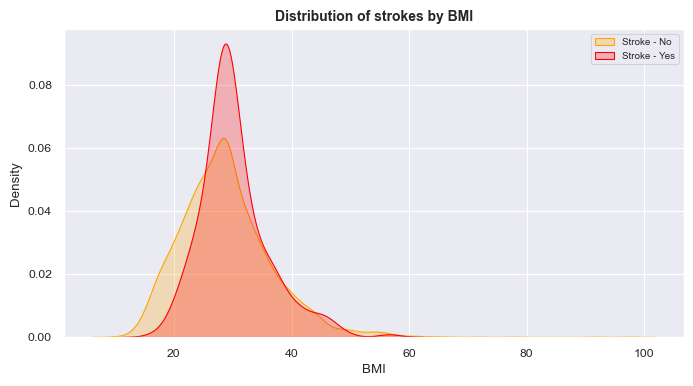

In [21]:
sns.set_context("paper",font_scale=1)
_, ax = plt.subplots(figsize=(8,4))
ax = sns.kdeplot(df.bmi[(df["stroke"] == 0) ], color='orange', fill=True);
ax = sns.kdeplot(df.bmi[(df["stroke"] == 1) ], color='red', fill=True);
ax.legend(["Stroke - No","Stroke - Yes"],loc='upper right',fontsize=7);
ax.set_ylabel('Density');
ax.set_xlabel('BMI');
ax.set_title('Distribution of strokes by BMI',fontdict={'fontsize':10,'fontweight':'bold'});

In [8]:
#enkodowanie danych na dane liczbowe
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

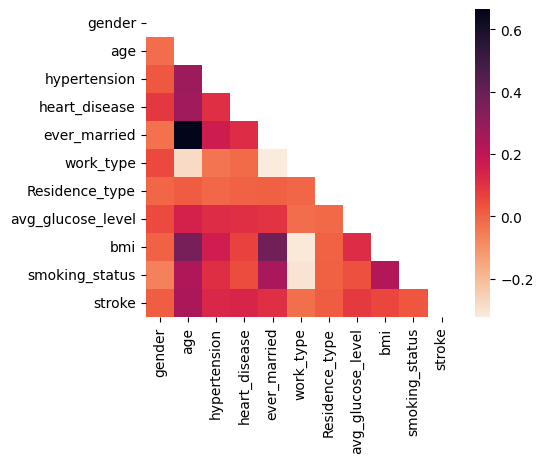

In [9]:
plt.figure(figsize=(5,4))
cor = df.corr(method="spearman")
mask = np.triu(np.ones_like(cor, dtype=bool)) 
sns.heatmap(cor, mask=mask, cmap=sns.color_palette("rocket_r", as_cmap=True))
plt.show();

In [10]:
df.corr(method="spearman")['stroke'][:].sort_values(ascending=False)

stroke               1.000000
age                  0.249530
heart_disease        0.134905
hypertension         0.127891
ever_married         0.108299
avg_glucose_level    0.082585
bmi                  0.054964
smoking_status       0.026388
Residence_type       0.015415
gender               0.009081
work_type           -0.024664
Name: stroke, dtype: float64

In [11]:
#Define y,X
X= df.drop(["stroke"], axis=1)
y= df["stroke"]

In [12]:
print('X Shape', X.shape)
print('Y Shape',y.shape)

X Shape (5109, 10)
Y Shape (5109,)


In [19]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [16]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[5,9])],remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,train_size=0.8,stratify=y)

print('Number transations x_train df',X_train.shape)
print('Number transations x_test df',X_test.shape)
print('Number transations y_train df',y_train.shape)
print('Number transations y_test df',y_test.shape)

Number transations x_train df (4087, 17)
Number transations x_test df (1022, 17)
Number transations y_train df (4087,)
Number transations y_test df (1022,)


In [12]:
param_grid = {
    "n_estimators": range (2, 20),
    "scale_pos_weight": range (2, 20),
    "booster": ["gbtree", "gblinear", "dart"],
    "scale_pos_weight": range (2, 20)
}

grid = GridSearchCV(estimator = xgb.XGBClassifier(random_state=42),
                             param_grid = param_grid,        
                             n_jobs = -1,
                             verbose = 1,
                             cv = 10,
                             error_score='raise'
                            )

grid.fit(X_train, y_train)

Fitting 10 folds for each of 972 candidates, totalling 9720 fits


GridSearchCV(cv=10, error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'n_estimators': range(2, 20),
                         'scale_pos_weight': range(2, 20)},
             verbose=1)

In [13]:
grid.best_params_

{'booster': 'gblinear', 'n_estimators': 2, 'scale_pos_weight': 2}

In [21]:
xgbc = xgb.XGBClassifier(n_estimators = 4, booster = "gblinear", random_state=0, scale_pos_weight = 2)

In [22]:
%%time

start = time.time() #czas rozpoczęcia

xgbc.fit(X_train, y_train) # trenowanie modelu

end = time.time() #czas zakończenia
print("time: ", end - start)

time:  0.00550079345703125
CPU times: user 11.5 ms, sys: 7.47 ms, total: 19 ms
Wall time: 5.66 ms


In [23]:
y_train_pred = xgbc.predict(X_train)

In [24]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3888
           1       0.40      0.02      0.04       199

    accuracy                           0.95      4087
   macro avg       0.68      0.51      0.51      4087
weighted avg       0.93      0.95      0.93      4087



In [25]:
y_pred = xgbc.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.33      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.64      0.51      0.51      1022
weighted avg       0.92      0.95      0.93      1022



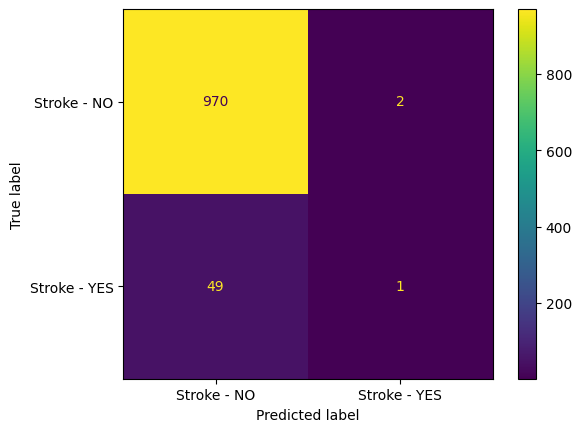

In [27]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=["Stroke - NO", "Stroke - YES"]).plot()
plt.show()

In [28]:
y_prob = xgbc.predict_proba(X_test)[:,1]

In [29]:
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

ROC AUC score: 0.6519958847736625
Accuracy Score:  0.9500978473581213


Text(0.5, 0, 'False Positive Rate')

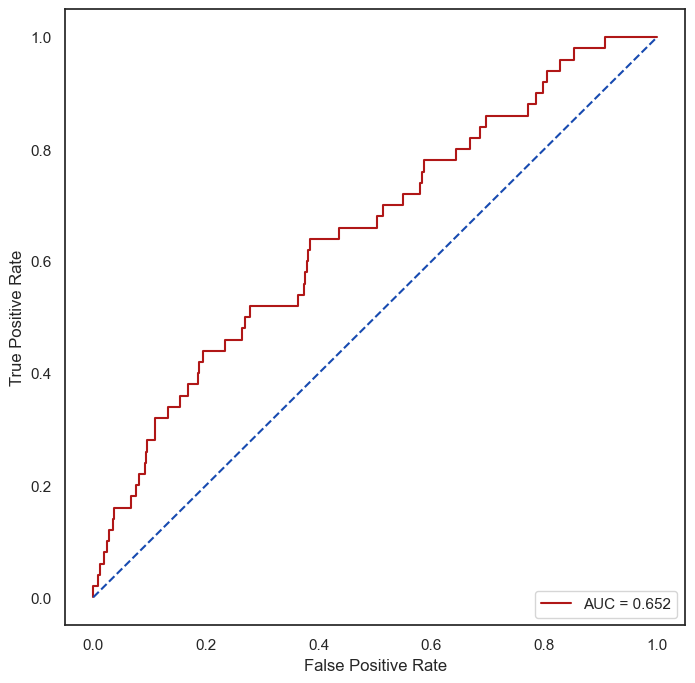

In [30]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')